In [1]:

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pandas as pd

df_binary = pd.read_csv('excluded_cols_binary.csv')
df = pd.read_csv('cleaned train_identity.csv')
df = df.drop('Unnamed: 0', axis = 1)
X = df.drop(['isFraud', 'TransactionID'], axis=1)
X = X[['id_17', 'DeviceInfo']]
y = df['isFraud']
print('y is fraud',len(y[y==1]))
print('y is not fraud',len(y[y==0]))
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_r)
#mm_scaler.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
#or x in range(1):
plt.scatter(X_train_minmax[y == 0, 0], X_train_minmax[y == 0, 1], color='blue', alpha=.5, lw=2,
                    label='isFraud')
plt.scatter(X_train_minmax[y == 1, 0], X_train_minmax[y == 1, 1], color='red', alpha=.5, lw=2,
                    label='isNotFraud')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Identity dataset')


y is fraud 7641
y is not fraud 7641
explained variance ratio (first two components): [0.99723449 0.00276551]


C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Text(0.5, 1.0, 'PCA of Identity dataset')

id_16, id_28 0.8642229798564903
id_15, id_28 0.8757584582626737
id_35, id_17 -0.8925097391563214
id_16, id_15 0.9868280137092055
id_31, id_37 -0.6142323640255591
id_16, id_29 0.8616218857559017
id_15, id_29 0.8616218857559017


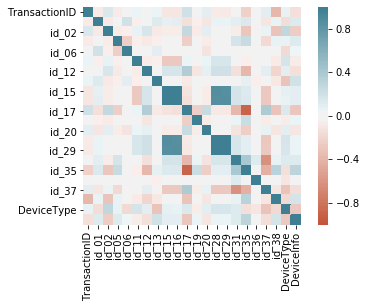

In [2]:
import seaborn as sns

X = df.drop('isFraud', axis=1)

corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

print('id_16, id_28',corr['id_16']['id_28'])
print('id_15, id_28',corr['id_15']['id_28'])
print('id_35, id_17',corr['id_35']['id_17'])
print('id_16, id_15',corr['id_16']['id_15'])
print('id_31, id_37',corr['id_31']['id_37'])
print('id_16, id_29',corr['id_15']['id_29'])
print('id_15, id_29',corr['id_15']['id_29'])

TransactionID    0.153193
id_01            0.195182
id_02            0.281958
id_05            0.252635
id_06            0.195182
id_11            0.186573
id_12            0.173170
id_13            0.191316
id_15            0.173170
id_19            0.228825
id_20            0.107806
id_35            0.321712
id_36            0.025804
id_37            0.100487
id_38            0.321712
DeviceType       0.281958
DeviceInfo       0.299918
dtype: float64

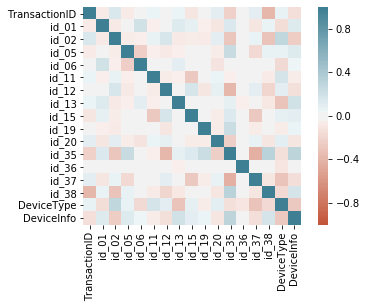

In [3]:
X_cut = X.drop(['id_16', 'id_17', 'id_29', 'id_28', 'id_31'], axis=1)

corr = X_cut.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
for column in corr.columns.values:
    corr[column][column] = 0
    
corr.apply(max)

explained variance ratio (first two components): [9.99994206e-01 4.96508050e-06]


Text(0.5, 1.0, 'PCA of Identity dataset')

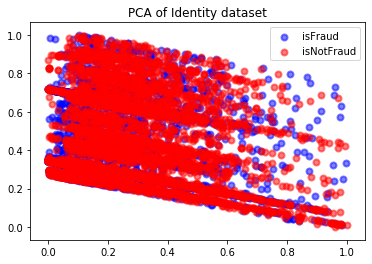

In [4]:
pca = PCA(n_components=2)
X_cut_subset = X_cut[['id_01', 'id_02','DeviceInfo', 'id_20', 'id_35', 'id_06', 'id_19', 'id_05',\
                     'id_13']]
#X_cut_subset = X_cut
X_r = pca.fit(X_cut_subset).transform(X_cut_subset)

mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_r)
#mm_scaler.transform(X_test)



# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

#or x in range(1):
plt.scatter(X_train_minmax[y == 0, 0], X_train_minmax[y == 0, 1], color='blue', alpha=.5, lw=2,
                    label='isFraud')
plt.scatter(X_train_minmax[y == 1, 0], X_train_minmax[y == 1, 1], color='red', alpha=.5, lw=2,
                    label='isNotFraud')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Identity dataset')

In [37]:
from sklearn.manifold import TSNE
from random import sample
X_r_sample = X.drop('TransactionID', axis = 1).sample(n = 500)

X_embedded = TSNE(n_components = 2).fit_transform(X_r_sample)



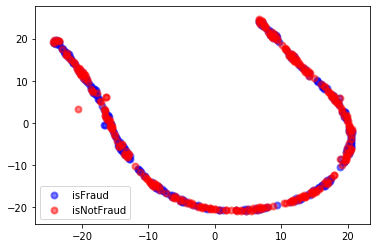

In [38]:
y_sample = y[X_r_sample.index.values]
plt.scatter(X_embedded[y_sample == 0, 0], X_embedded[y_sample == 0, 1], color='blue', alpha=.5, lw=2,
                    label='isFraud')
plt.scatter(X_embedded[y_sample == 1, 0], X_embedded[y_sample == 1, 1], color='red', alpha=.5, lw=2,
                    label='isNotFraud')
plt.legend(loc = 'best')


In [39]:
X_r_sample = X.drop('TransactionID', axis = 1).sample(n = 500)

X_embedded = TSNE(n_components = 3).fit_transform(X_r_sample)


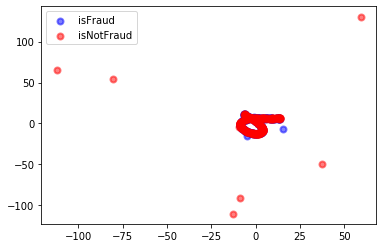

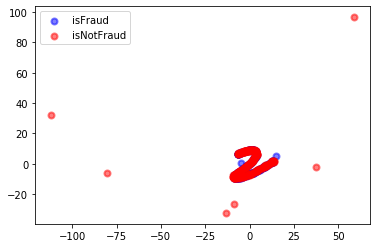

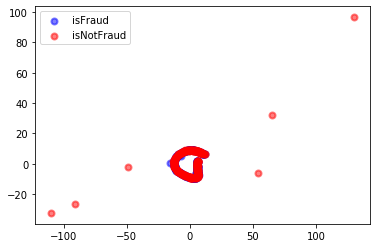

In [41]:
y_sample = y[X_r_sample.index.values]
plt.scatter(X_embedded[y_sample == 0, 0], X_embedded[y_sample == 0, 1], color='blue', alpha=.5, lw=2,
                    label='isFraud')
plt.scatter(X_embedded[y_sample == 1, 0], X_embedded[y_sample == 1, 1], color='red', alpha=.5, lw=2,
                    label='isNotFraud')
plt.legend(loc = 'best')

plt.figure()
plt.scatter(X_embedded[y_sample == 0, 0], X_embedded[y_sample == 0, 2], color='blue', alpha=.5, lw=2,
                    label='isFraud')
plt.scatter(X_embedded[y_sample == 1, 0], X_embedded[y_sample == 1, 2], color='red', alpha=.5, lw=2,
                    label='isNotFraud')
plt.legend(loc = 'best')
plt.figure()
plt.scatter(X_embedded[y_sample == 0, 1], X_embedded[y_sample == 0, 2], color='blue', alpha=.5, lw=2,
                    label='isFraud')
plt.scatter(X_embedded[y_sample == 1, 1], X_embedded[y_sample == 1, 2], color='red', alpha=.5, lw=2,
                    label='isNotFraud')
plt.legend(loc = 'best')
